In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600  ! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d himanshupoddar/zomato-bangalore-restaurants

chmod: cannot access '!': No such file or directory
chmod: cannot access 'chmod': No such file or directory
chmod: cannot access '600': No such file or directory
 76% 68.0M/89.0M [00:01<00:00, 37.4MB/s]
100% 89.0M/89.0M [00:01<00:00, 68.1MB/s]


In [ ]:
! unzip /content/zomato-bangalore-restaurants.zip

Archive:  /content/zomato-bangalore-restaurants.zip
  inflating: zomato.csv              


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv("/content/zomato.csv")

In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.shape

(51717, 17)

In [ ]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

## Data Cleaning

In [ ]:
df = df.drop(['url', 'address', 'phone'], axis=1)

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
np.dtype(df['rate'])

dtype('O')

In [ ]:
df['rate'] = df['rate'].apply(lambda x: str(x).split('/')[0])
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: object

In [ ]:
np.dtype(df['rate'])

dtype('O')

In [ ]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [ ]:
df['rate'].replace({'NEW': 0, '-':0}, inplace=True)
df['rate']= df['rate'].astype(str).astype(float)

In [ ]:
df.rate.dtype

dtype('float64')

In [ ]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [ ]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [ ]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).apply(lambda x: x.replace(',', '')).astype(float)

In [ ]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['rate',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [ ]:
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate has 15.0337 % missing values
location has 0.0406 % missing values
rest_type has 0.4389 % missing values
dish_liked has 54.2916 % missing values
cuisines has 0.087 % missing values
approx_cost(for two people) has 0.669 % missing values


## EDA

In [ ]:
df['listed_in(type)'].value_counts()

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: listed_in(type), dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

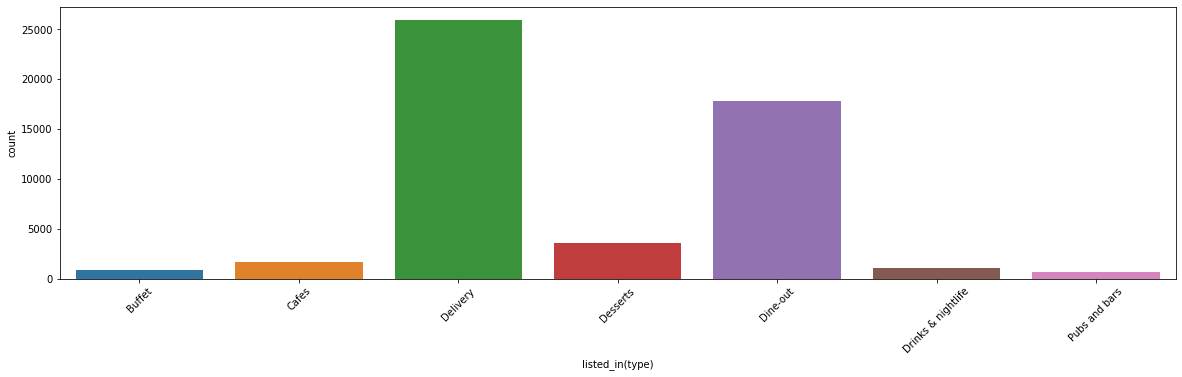

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(data=df, x='listed_in(type)')
plt.xticks(rotation = 45)

In [ ]:
count =  df['listed_in(type)'].value_counts().to_frame()
count = count.reset_index()
count.columns = ['dinning_type', 'count']
count.head()

,dinning_type,count
0,Delivery,25942
1,Dine-out,17779
2,Desserts,3593
3,Cafes,1723
4,Drinks & nightlife,1101


In [ ]:
px.pie(count, names='dinning_type', values='count')

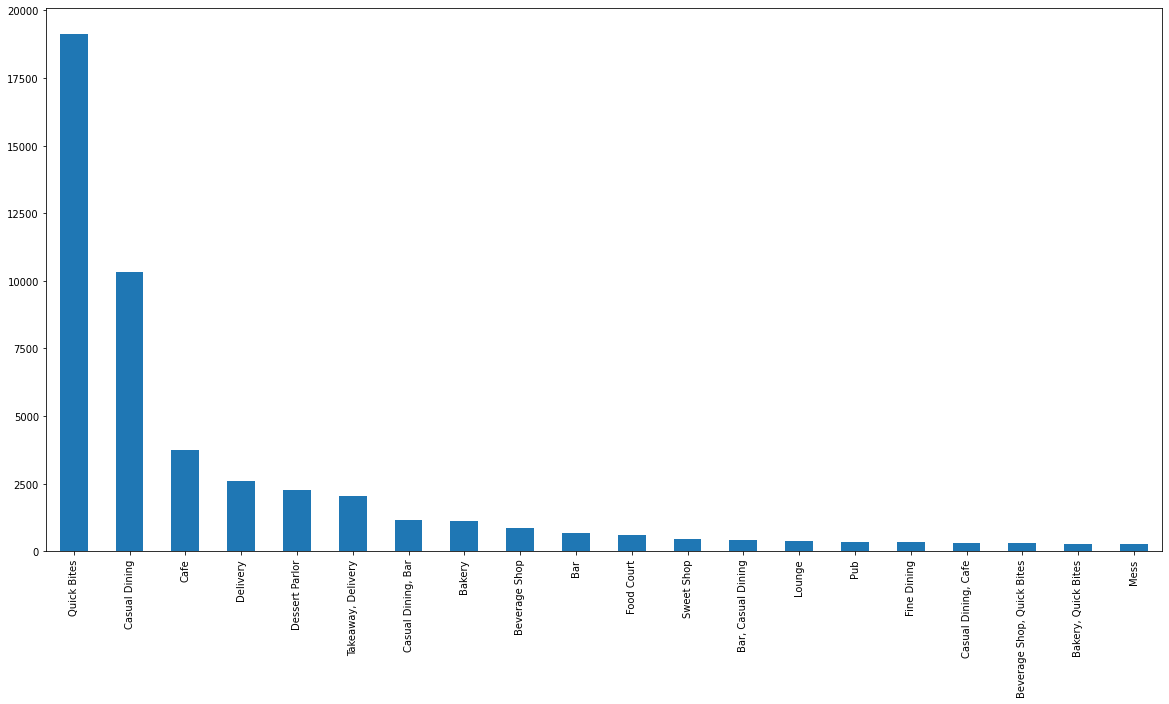

In [ ]:
plt.figure(figsize=(20,10))
df['rest_type'].value_counts().nlargest(20).plot(kind="bar")

In [ ]:
df['rest_type_cleaned'] = df['rest_type'].apply(lambda x: "Quick_Bites+ Casual_Dining" if x in("Quick Bites", "Casual Dining") else "others")

In [ ]:
rest = df['rest_type_cleaned'].value_counts().to_frame()
rest = rest.reset_index()
rest.columns = ['rest_type', 'count']

In [ ]:
px.pie(rest, 'rest_type', 'count')

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rest_type_cleaned
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick_Bites+ Casual_Dining
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick_Bites+ Casual_Dining
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick_Bites+ Casual_Dining
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick_Bites+ Casual_Dining


In [ ]:
name_count = df['name'].value_counts().to_frame().reset_index()

In [ ]:
name_count.head()

,index,name
0,Cafe Coffee Day,96
1,Onesta,85
2,Just Bake,73
3,Empire Restaurant,71
4,Five Star Chicken,70


In [ ]:
name_count.columns = ['name', 'count']

In [ ]:
group = df.groupby(by="name").agg({'rate':'mean', 'votes':'sum','approx_cost(for two people)':'mean' })

In [ ]:
group = group.merge(name_count, left_on='name', right_on='name')

In [ ]:
group['votes_per_count'] = group['votes']/group['count']

In [ ]:
group.head()

,name,rate,votes,approx_cost(for two people),count,votes_per_count
0,#FeelTheROLL,3.4,14,200.0,2,7.0
1,#L-81 Cafe,3.9,432,400.0,9,48.0
2,#Vibes Restro,NaN,0,700.0,3,0.0
3,#refuel,3.7,111,400.0,3,37.0
4,'Brahmins' Thatte Idli,NaN,0,100.0,1,0.0


In [ ]:
group = group.sort_values(by='count')

Text(0.5, 1.0, 'Top 5 Less Voted Restaurants\n(with at least 1 vote)')

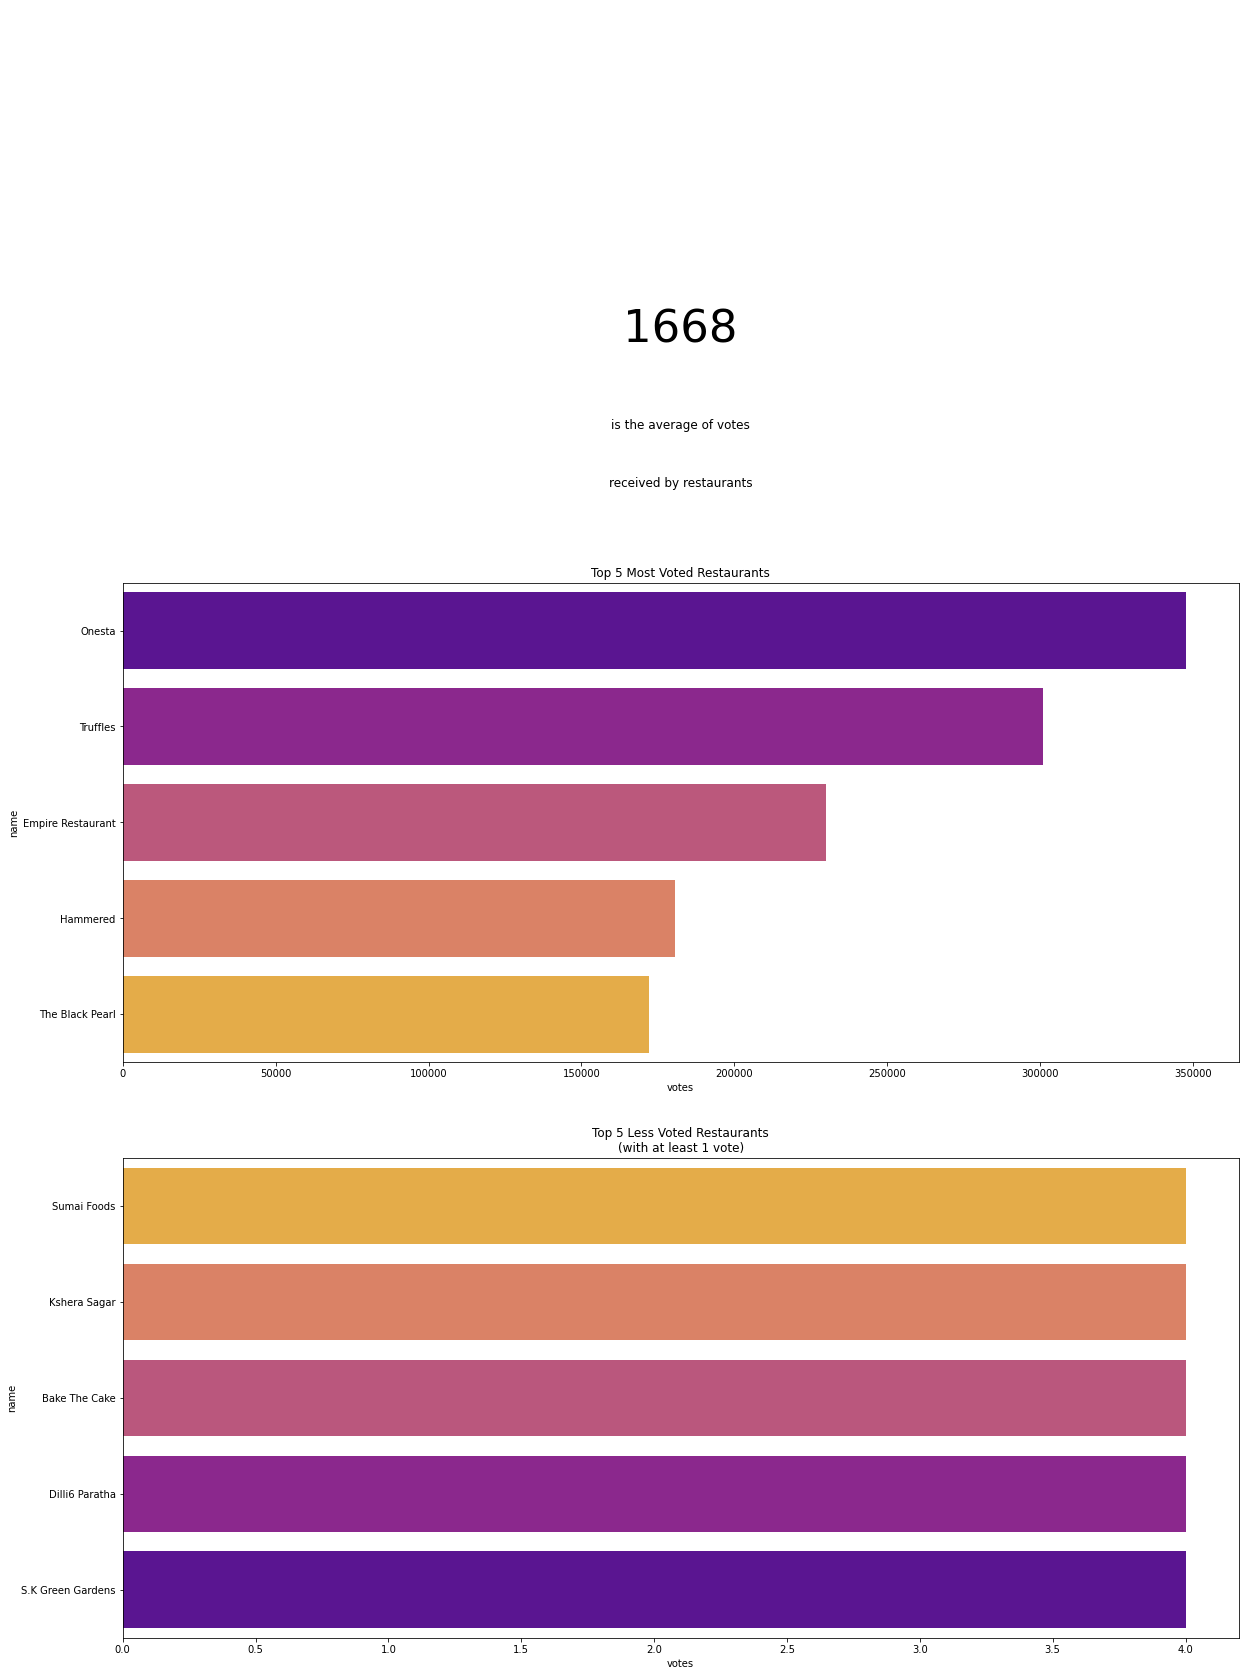

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(20,30))


# Annotations
ax1.text(0.50, 0.30, int(group['votes'].mean()), fontsize=45, ha='center')
ax1.text(0.50, 0.12, 'is the average of votes', fontsize=12, ha='center')
ax1.text(0.50, 0.00, 'received by restaurants', fontsize=12, ha='center')
ax1.axis('off')

sns.barplot(x='votes', y='name', data=group.sort_values(by='votes', ascending=False)[0:5],ax=ax2, palette='plasma')
ax2.set_title('Top 5 Most Voted Restaurants', size=12)

sns.barplot(x='votes', y='name', data=group.sort_values(by='votes', ascending=False).query('votes > 0').tail(),ax=ax3, palette='plasma_r')
ax3.set_title('Top 5 Less Voted Restaurants\n(with at least 1 vote)', size=12)

In [ ]:
group = group.rename({'approx_cost(for two people)':'avg_cost'}, axis=1 )

Text(0.5, 1.0, 'Top 5 Less Expensive Restaurants')

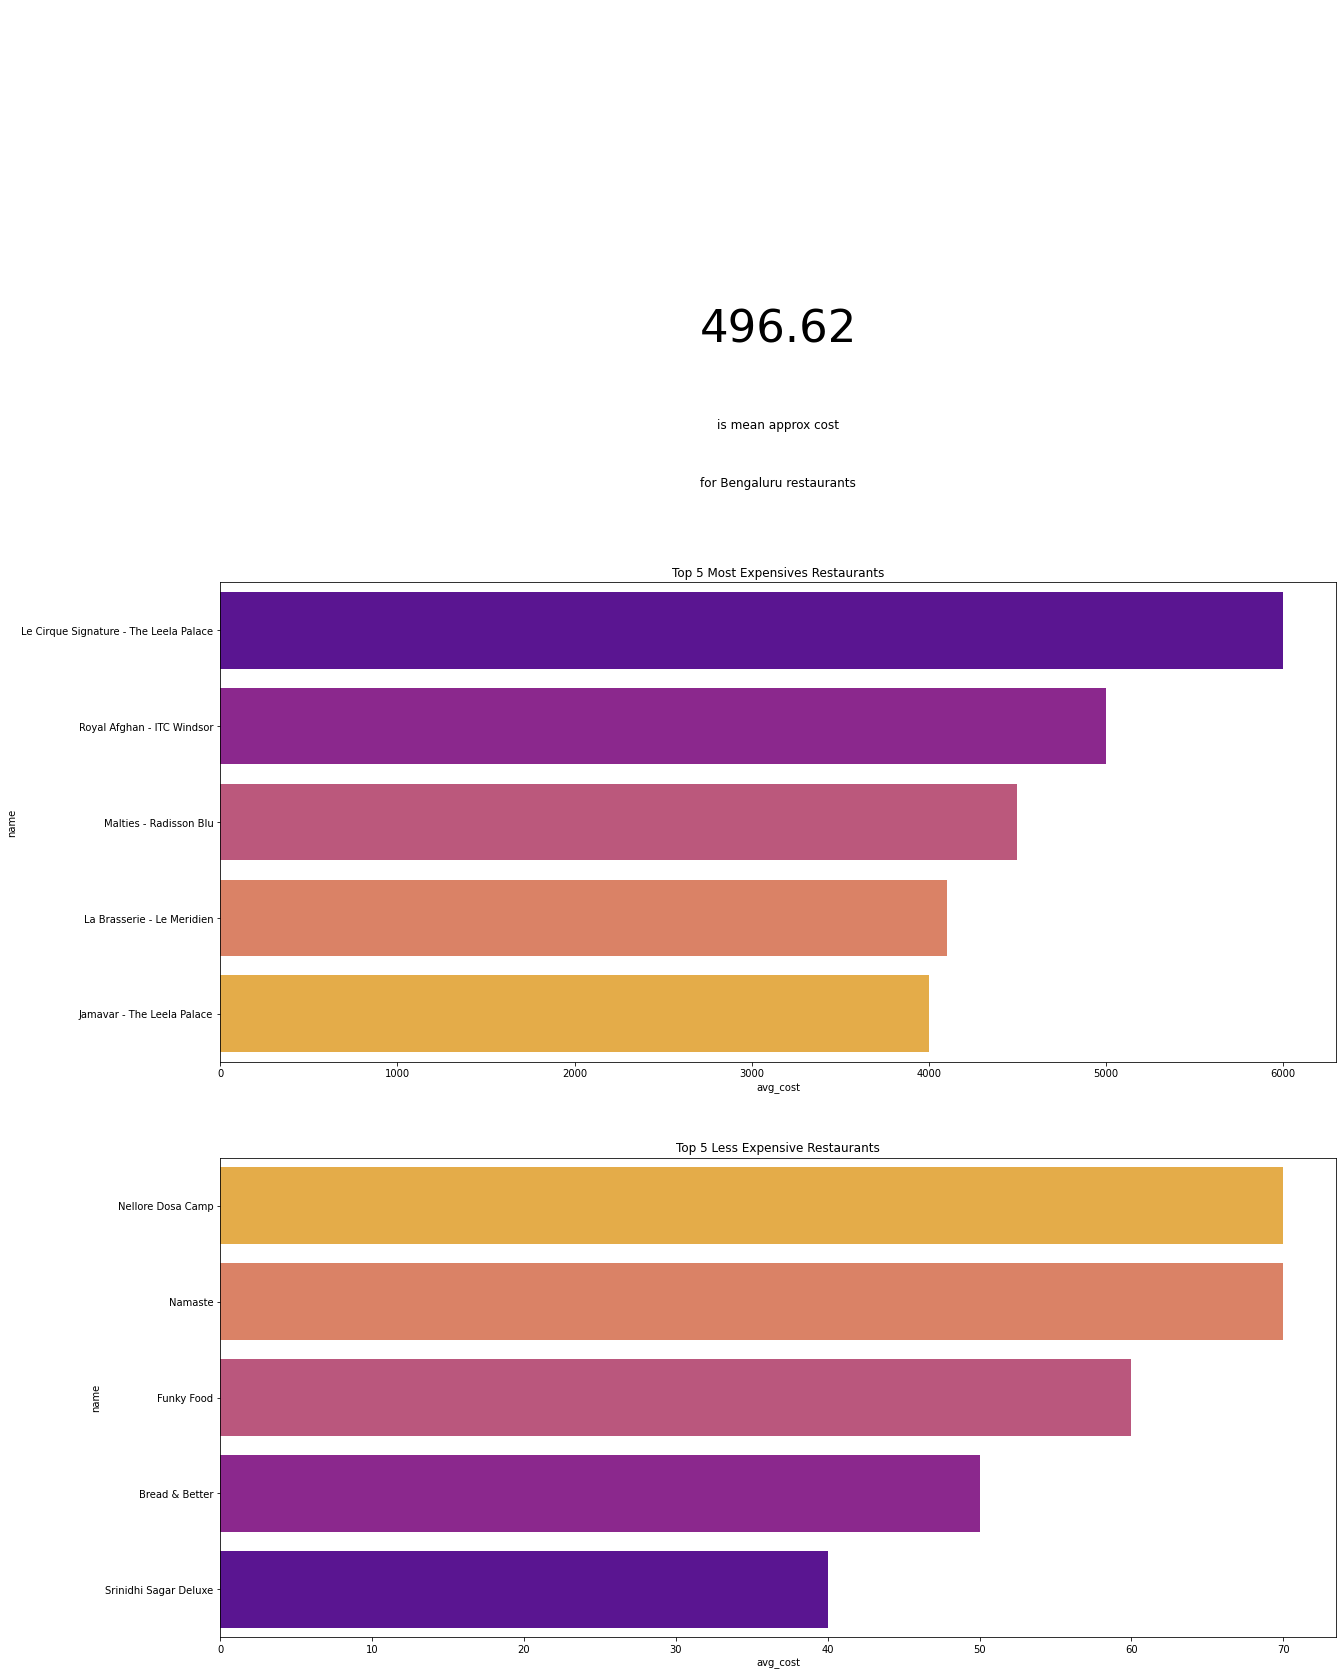

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(20,30))
ax1.text(0.50, 0.30, np.round(group['avg_cost'].mean(), 2), fontsize=45, ha='center')
ax1.text(0.50, 0.12, 'is mean approx cost', fontsize=12, ha='center')
ax1.text(0.50, 0.00, 'for Bengaluru restaurants', fontsize=12, ha='center')
ax1.axis('off')

sns.barplot(x='avg_cost', y='name', data=group.sort_values(by='avg_cost', ascending=False)[0:5],ax=ax2, palette='plasma')
ax2.set_title('Top 5 Most Expensives Restaurants', size=12)

sns.barplot(x='avg_cost', y='name', data=group.sort_values(by='avg_cost', ascending=False).query('avg_cost > 0').tail(),ax=ax3, palette='plasma_r')
ax3.set_title('Top 5 Less Expensive Restaurants', size=12)

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot
x=df['book_table'].value_counts()
labels=['not book','book']

In [ ]:
trace=go.Pie(labels=labels, values=x,
               hoverinfo='label+percent', textinfo='percent', 
               textfont=dict(size=25),
              pull=[0, 0, 0,0.2, 0]
               )
iplot([trace])

In [ ]:
x=df['online_order'].value_counts()
labels=['accepted','not accepted']
fig = px.pie(df, values=x, names=labels,title='Pie chart')
fig.show()

In [ ]:
def return_budget(location,restaurant):
    budget=df[(df['approx_cost(for two people)']<=400) & (df['location']==location) & 
                     (df['rate']>4) & (df['rest_type']==restaurant)]
    return(budget['name'].unique())

In [ ]:
return_budget('BTM',"Quick Bites")

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

In [ ]:
locations=pd.DataFrame({"Name":df['location'].unique()})
locations['new_Name']='Bangalore '+locations['Name']
locations.head()

,Name,new_Name
0,Banashankari,Bangalore Banashankari
1,Basavanagudi,Bangalore Basavanagudi
2,Mysore Road,Bangalore Mysore Road
3,Jayanagar,Bangalore Jayanagar
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout


In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
lat=[]
lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:    
        lat.append(location.latitude)
        lon.append(location.longitude)

In [ ]:
locations['latitude']=lat
locations['longitude']=lon
locations.to_csv('zomato_locations.csv',index=False)

In [ ]:
rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())
rest_locations.columns=['Name','count']
rest_locations.head()

,Name,count
0,BTM,5124
1,HSR,2523
2,Koramangala 5th Block,2504
3,JP Nagar,2235
4,Whitefield,2144


In [ ]:
restaurant_locations=rest_locations.merge(locations,on='Name',how="left").dropna()
restaurant_locations.head()

,Name,count,new_Name,latitude,longitude
0,BTM,5124,Bangalore BTM,45.954851,-112.496595
1,HSR,2523,Bangalore HSR,18.147500,41.538889
2,Koramangala 5th Block,2504,Bangalore Koramangala 5th Block,12.934377,77.628415
3,JP Nagar,2235,Bangalore JP Nagar,12.265594,76.646540
4,Whitefield,2144,Bangalore Whitefield,44.373058,-71.611858


In [ ]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [ ]:
import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()

In [ ]:
HeatMap(restaurant_locations[['latitude','longitude','count']].values.tolist(),max_zoom=20,radius=15).add_to(basemap)

In [ ]:
basemap

In [ ]:
type(df['dish_liked'][0])

str

In [ ]:
dish_liked = df[df['rest_type']=="Quick Bites"]['dish_liked'].astype(str).apply(lambda x: x.strip().split(','))
dish_liked.head()

3                                         [Masala Dosa]
31    [Burgers,  Lassi,  Chicken Grill,  Naan,  Momo...
34    [Rolls,  Veggie Wrap,  Chocolate Fantasy,  Ric...
36                                                [nan]
39                                                [nan]
Name: dish_liked, dtype: object

In [ ]:
dishes = ""
for value in dish_liked.values:
    dishes += ' '.join(value)


In [ ]:
from wordcloud import WordCloud

(-0.5, 1499.5, 1499.5, -0.5)

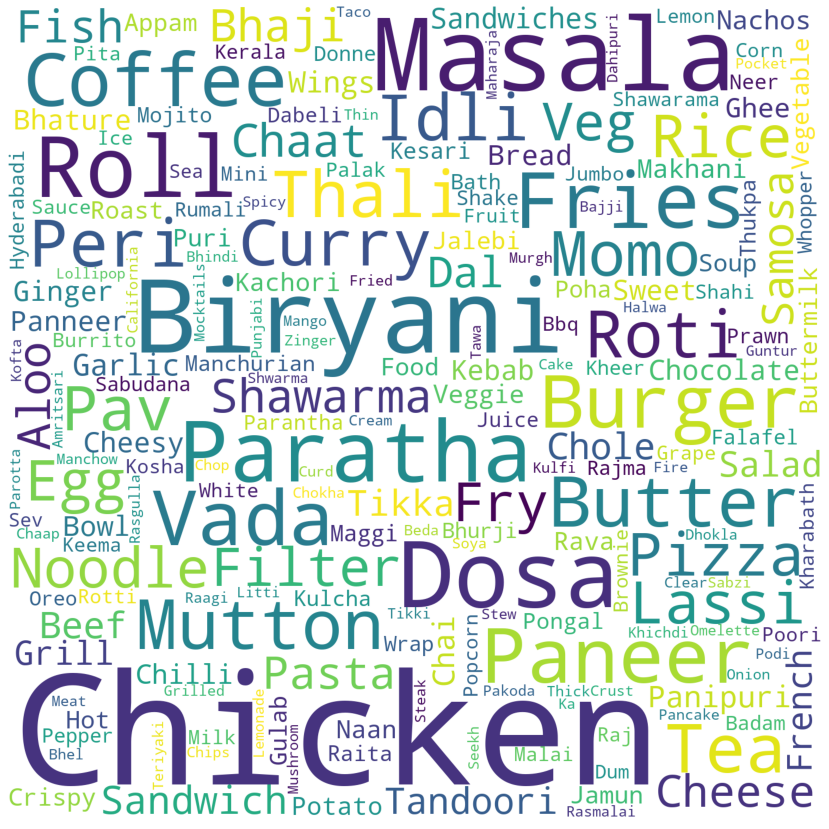

In [ ]:
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,width=1500, height=1500).generate(dishes)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis("off")

In [ ]:
df['reviews_list'][0]

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [ ]:
import re
def clean(string):
    string = string.lower()
    string = re.sub('[^a-z]',' ', string)
    string = re.sub('rated',' ', string)
    string = re.sub('x',' ', string)
    string=re.sub(' +',' ',string)
    return string[1:]

In [ ]:
print(clean(df['reviews_list'][0]))

n a beautiful place to dine in the interiors take you back to the mughal era the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again n i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangout ncheers n its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by vegetarians anyways we ordered ala carte items which took ages to come food was ok 

In [ ]:
review = df[df['rest_type']=="Quick Bites"]['reviews_list'].apply(clean)

In [ ]:
review.head()

3     n great food and proper karnataka style full m...
31    n worst restaurant ever veg manchurian worth d...
34    n not worth for the money we pay and ambience ...
36    n half baked rice in a special meal half baked...
39    n this restaurant serves the best benne dosas ...
Name: reviews_list, dtype: object

(-0.5, 1499.5, 1499.5, -0.5)

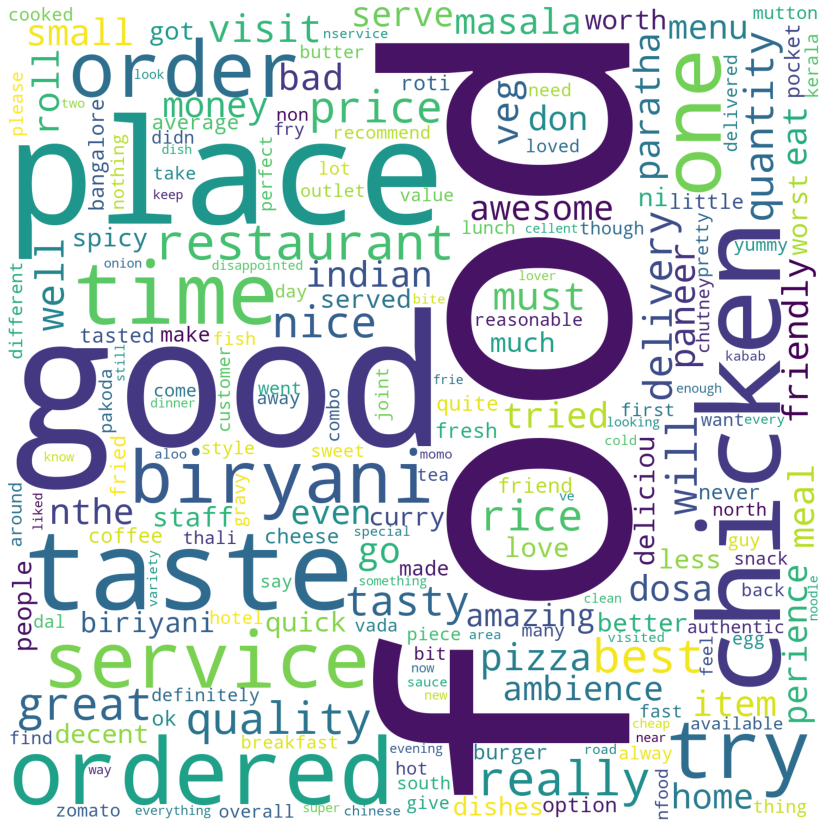

In [ ]:
reviews = ""
for string in review.values: 
    reviews += string

wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,width=1500, height=1500).generate(reviews)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis("off")

## Feature Extraction

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)',
       'rest_type_cleaned'],
      dtype='object')

In [ ]:
df1 = df['rate'].apply(lambda x: 1 if x>=3.7 else 0)
df1.value_counts()

0    27652
1    24065
Name: rate, dtype: int64

In [ ]:
df['target'] = df['rate'].apply(lambda x: 1 if x>=3.7 else 0)
df['total_cusines'] = df['cuisines'].astype(str).apply(lambda x: len(x.split()))
df['total_types'] = df['rest_type'].astype(str).apply(lambda x: len(x.split()))

In [ ]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)',
       'rest_type_cleaned', 'target', 'total_cusines', 'total_types'],
      dtype='object')

In [ ]:
imp_features = ['online_order','book_table','location','rest_type','total_types','total_cusines','listed_in(type)', 'listed_in(city)','approx_cost(for two people)','target']

In [ ]:
data = df[imp_features]

In [ ]:
data.isnull().sum()

online_order                     0
book_table                       0
location                        21
rest_type                      227
total_types                      0
total_cusines                    0
listed_in(type)                  0
listed_in(city)                  0
approx_cost(for two people)    346
target                           0
dtype: int64

In [ ]:
data.dropna(how='any',inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data.head()

,online_order,book_table,location,rest_type,total_types,total_cusines,listed_in(type),listed_in(city),approx_cost(for two people),target
0,Yes,Yes,Banashankari,Casual Dining,2,4,Buffet,Banashankari,800.0,1
1,Yes,No,Banashankari,Casual Dining,2,4,Buffet,Banashankari,800.0,1
2,Yes,No,Banashankari,"Cafe, Casual Dining",3,3,Buffet,Banashankari,800.0,1
3,No,No,Banashankari,Quick Bites,2,4,Buffet,Banashankari,300.0,1
4,No,No,Basavanagudi,Casual Dining,2,3,Buffet,Banashankari,600.0,1


In [ ]:
data.isnull().sum()

online_order                   0
book_table                     0
location                       0
rest_type                      0
total_types                    0
total_cusines                  0
listed_in(type)                0
listed_in(city)                0
approx_cost(for two people)    0
target                         0
dtype: int64

In [ ]:
cat_features= [col for col in data.columns if data[col].dtype == 'O']
num_features= [col for col in data.columns if data[col].dtype != 'O']

In [ ]:
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [ ]:
for feature in cat_features:
    print('{} has total {} unique features'.format(feature, data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 93 unique features
rest_type has total 93 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


In [ ]:
data.shape

(51167, 10)

In [ ]:
cols=['location','rest_type','listed_in(city)']
for col in cols:
    print('Total feature in {} are {}'.format(col,data[col].nunique()))
    print(data[col].value_counts()/(len(data))*100)
    print('\n')

Total feature in location are 93
BTM                      9.910685
HSR                      4.878144
Koramangala 5th Block    4.848828
JP Nagar                 4.336780
Whitefield               4.137432
                           ...   
West Bangalore           0.011726
Yelahanka                0.009772
Jakkur                   0.005863
Rajarajeshwari Nagar     0.003909
Peenya                   0.001954
Name: location, Length: 93, dtype: float64


Total feature in rest_type are 93
Quick Bites                   37.227119
Casual Dining                 20.081302
Cafe                           7.205816
Delivery                       5.055993
Dessert Parlor                 4.387594
                                ...    
Cafe, Food Court               0.003909
Bakery, Food Court             0.003909
Food Court, Beverage Shop      0.003909
Sweet Shop, Dessert Parlor     0.001954
Quick Bites, Kiosk             0.001954
Name: rest_type, Length: 93, dtype: float64


Total feature in listed_in(c

In [ ]:
percent=data['location'].value_counts()/len(data)*100
values=percent.values

In [ ]:
len(values[values>0.4])

47

In [ ]:
values=data['location'].value_counts()/len(data)*100
values

BTM                      9.910685
HSR                      4.878144
Koramangala 5th Block    4.848828
JP Nagar                 4.336780
Whitefield               4.137432
                           ...   
West Bangalore           0.011726
Yelahanka                0.009772
Jakkur                   0.005863
Rajarajeshwari Nagar     0.003909
Peenya                   0.001954
Name: location, Length: 93, dtype: float64

In [ ]:
threshold=0.4
imp=values[values>threshold]
imp

BTM                      9.910685
HSR                      4.878144
Koramangala 5th Block    4.848828
JP Nagar                 4.336780
Whitefield               4.137432
Indiranagar              3.973264
Jayanagar                3.744601
Marathahalli             3.539391
Bannerghatta Road        3.148514
Bellandur                2.484023
Electronic City          2.441026
Koramangala 1st Block    2.417574
Brigade Road             2.380441
Koramangala 7th Block    2.298356
Koramangala 6th Block    2.206500
Sarjapur Road            2.050150
Ulsoor                   1.987609
Koramangala 4th Block    1.987609
Banashankari             1.770673
MG Road                  1.747220
Kalyan Nagar             1.647546
Richmond Road            1.571325
Malleshwaram             1.414974
Frazer Town              1.407157
Basavanagudi             1.336799
Residency Road           1.317255
Brookefield              1.282076
Banaswadi                1.260578
New BEL Road             1.258624
Kammanahalli  

In [ ]:
data['location']=np.where(data['location'].isin(imp.index),data['location'],'other')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data['location'].nunique()

48

In [ ]:
values2=data['rest_type'].value_counts()/len(data)*100
values2

Quick Bites                   37.227119
Casual Dining                 20.081302
Cafe                           7.205816
Delivery                       5.055993
Dessert Parlor                 4.387594
                                ...    
Cafe, Food Court               0.003909
Bakery, Food Court             0.003909
Food Court, Beverage Shop      0.003909
Sweet Shop, Dessert Parlor     0.001954
Quick Bites, Kiosk             0.001954
Name: rest_type, Length: 93, dtype: float64

In [ ]:
data['rest_type'].head(20)

0           Casual Dining
1           Casual Dining
2     Cafe, Casual Dining
3             Quick Bites
4           Casual Dining
5           Casual Dining
6           Casual Dining
7     Casual Dining, Cafe
8                    Cafe
9                    Cafe
10                   Cafe
11                   Cafe
12                   Cafe
13                   Cafe
14    Cafe, Casual Dining
15                   Cafe
16                   Cafe
17                   Cafe
18                   Cafe
19                   Cafe
Name: rest_type, dtype: object

In [ ]:
len(values2[values2>0.3])

26

In [ ]:
threshold=1.5
imp2=values2[values2>1.5]
imp2

Quick Bites           37.227119
Casual Dining         20.081302
Cafe                   7.205816
Delivery               5.055993
Dessert Parlor         4.387594
Takeaway, Delivery     3.940039
Bakery                 2.229953
Casual Dining, Bar     2.220181
Beverage Shop          1.694452
Name: rest_type, dtype: float64

In [ ]:
imp2.index

Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Delivery', 'Dessert Parlor',
       'Takeaway, Delivery', 'Bakery', 'Casual Dining, Bar', 'Beverage Shop'],
      dtype='object')

In [ ]:
data['rest_type'].isin(imp2.index)

0         True
1         True
2        False
3         True
4         True
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Name: rest_type, Length: 51167, dtype: bool

In [ ]:
data['rest_type']=np.where(data['rest_type'].isin(imp2.index),data['rest_type'],'other')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data['rest_type']

0        Casual Dining
1        Casual Dining
2                other
3          Quick Bites
4        Casual Dining
             ...      
51712            other
51713            other
51714            other
51715            other
51716            other
Name: rest_type, Length: 51167, dtype: object

In [ ]:
for feature in cat_features:
    print('{} has total {} unique features'.format(feature, data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 48 unique features
rest_type has total 10 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


In [ ]:
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [ ]:
data_cat = data[cat_features]
for col in cat_features:
    col_encoded = pd.get_dummies(data_cat[col],prefix=col,drop_first=True)
    data_cat=pd.concat([data_cat,col_encoded],axis=1)
    data_cat.drop(col, axis=1, inplace=True)

In [ ]:
data_cat.shape

(51167, 93)

In [ ]:
data_cat.head(10)

,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Bellandur,location_Bommanahalli,location_Brigade Road,location_Brookefield,location_Church Street,location_Commercial Street,location_Cunningham Road,location_Domlur,location_Ejipura,location_Electronic City,location_Frazer Town,location_HSR,location_Indiranagar,location_JP Nagar,location_Jayanagar,location_Jeevan Bhima Nagar,location_Kalyan Nagar,location_Kammanahalli,location_Koramangala 1st Block,location_Koramangala 3rd Block,location_Koramangala 4th Block,location_Koramangala 5th Block,location_Koramangala 6th Block,location_Koramangala 7th Block,location_Koramangala 8th Block,location_Lavelle Road,location_MG Road,location_Malleshwaram,location_Marathahalli,location_New BEL Road,location_Old Airport Road,location_Rajajinagar,location_Residency Road,location_Richmond Road,...,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,"rest_type_Takeaway, Delivery",rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars,listed_in(city)_Banashankari,listed_in(city)_Bannerghatta Road,listed_in(city)_Basavanagudi,listed_in(city)_Bellandur,listed_in(city)_Brigade Road,listed_in(city)_Brookefield,listed_in(city)_Church Street,listed_in(city)_Electronic City,listed_in(city)_Frazer Town,listed_in(city)_HSR,listed_in(city)_Indiranagar,listed_in(city)_JP Nagar,listed_in(city)_Jayanagar,listed_in(city)_Kalyan Nagar,listed_in(city)_Kammanahalli,listed_in(city)_Koramangala 4th Block,listed_in(city)_Koramangala 5th Block,listed_in(city)_Koramangala 6th Block,listed_in(city)_Koramangala 7th Block,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.head()

,online_order,book_table,location,rest_type,total_types,total_cusines,listed_in(type),listed_in(city),approx_cost(for two people),target
0,Yes,Yes,Banashankari,Casual Dining,2,4,Buffet,Banashankari,800.0,1
1,Yes,No,Banashankari,Casual Dining,2,4,Buffet,Banashankari,800.0,1
2,Yes,No,Banashankari,other,3,3,Buffet,Banashankari,800.0,1
3,No,No,Banashankari,Quick Bites,2,4,Buffet,Banashankari,300.0,1
4,No,No,Basavanagudi,Casual Dining,2,3,Buffet,Banashankari,600.0,1


In [ ]:
data_final=pd.concat([data.loc[:,['total_types','total_cusines','approx_cost(for two people)','target']],data_cat],axis=1)

In [ ]:
data_final.shape

(51167, 97)

In [ ]:
X = data_final.drop('target', axis=1)
y = data_final['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [ ]:
X_train.shape

(40933, 96)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

[[4675 1518]
 [ 814 3227]]


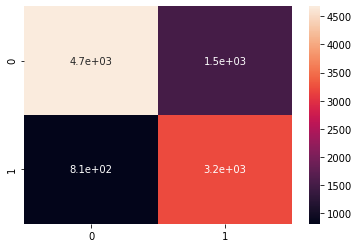

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predictions, y_test)
print(cm)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions,y_test)

0.7721321086574164

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))

In [ ]:
for name,model in models:
    print(name)
    print(models)

LogisticRegression
[('LogisticRegression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)), ('Naive Bayes', GaussianNB(priors=None, var_smoothing=1e-09)), ('RandomForest', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)), 

In [ ]:
for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    
    # Make predictions.
    predictions = model.predict(X_test)

    # Compute the error.
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))

    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions,y_test))
    print('\n')

LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[[4475 1791]
 [1014 2954]]
0.7259136212624585


Naive Bayes
[[4018 1762]
 [1471 2983]]
0.6840922415477819


RandomForest
[[4608 1104]
 [ 881 3641]]
0.8060386945475865


Decision Tree
[[4776  943]
 [ 713 3802]]
0.8381864373656439


KNN
[[4773 1148]
 [ 716 3597]]
0.8178620285323431


